1. Develop a program to create histograms for all numerical features and analyze the distribution of each feature. Generate box plots for all numerical features and identify any outliers. Use California Housing dataset.

In [3]:
# Run this cell first to install required packages
!pip install pandas numpy matplotlib seaborn scikit-learn

  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp312-cp312-win_amd64.whl.metadata (104 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached scipy-1.15.2-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   - ---------------------

Dataset shape: (20640, 10)

Feature information:
MedInc: {'min': 0.4999, 'mean': 3.8706710029069766, 'max': 15.0001}
HouseAge: {'min': 1.0, 'mean': 28.639486434108527, 'max': 52.0}
AveRooms: {'min': 0.8461538461538461, 'mean': 5.428999742190376, 'max': 141.9090909090909}
AveBedrms: {'min': 0.3333333333333333, 'mean': 1.096675149606208, 'max': 34.06666666666667}
Population: {'min': 3.0, 'mean': 1425.4767441860465, 'max': 35682.0}
AveOccup: {'min': 0.6923076923076923, 'mean': 3.0706551594363742, 'max': 1243.3333333333333}
Latitude: {'min': 32.54, 'mean': 35.63186143410853, 'max': 41.95}
Longitude: {'min': -124.35, 'mean': -119.56970445736432, 'max': -114.31}
MedHouseVal: {'min': 0.14999, 'mean': 2.068558169089147, 'max': 5.00001}
MEDV: {'min': 0.14999, 'mean': 2.068558169089147, 'max': 5.00001}

MedInc Analysis:
  Skewness: 1.65
  Outliers: 681 (3.30%)

MedInc Analysis:
  Skewness: 1.65
  Outliers: 681 (3.30%)

HouseAge Analysis:
  Skewness: 0.06
  Outliers: 0 (0.00%)

HouseAge Analysis:

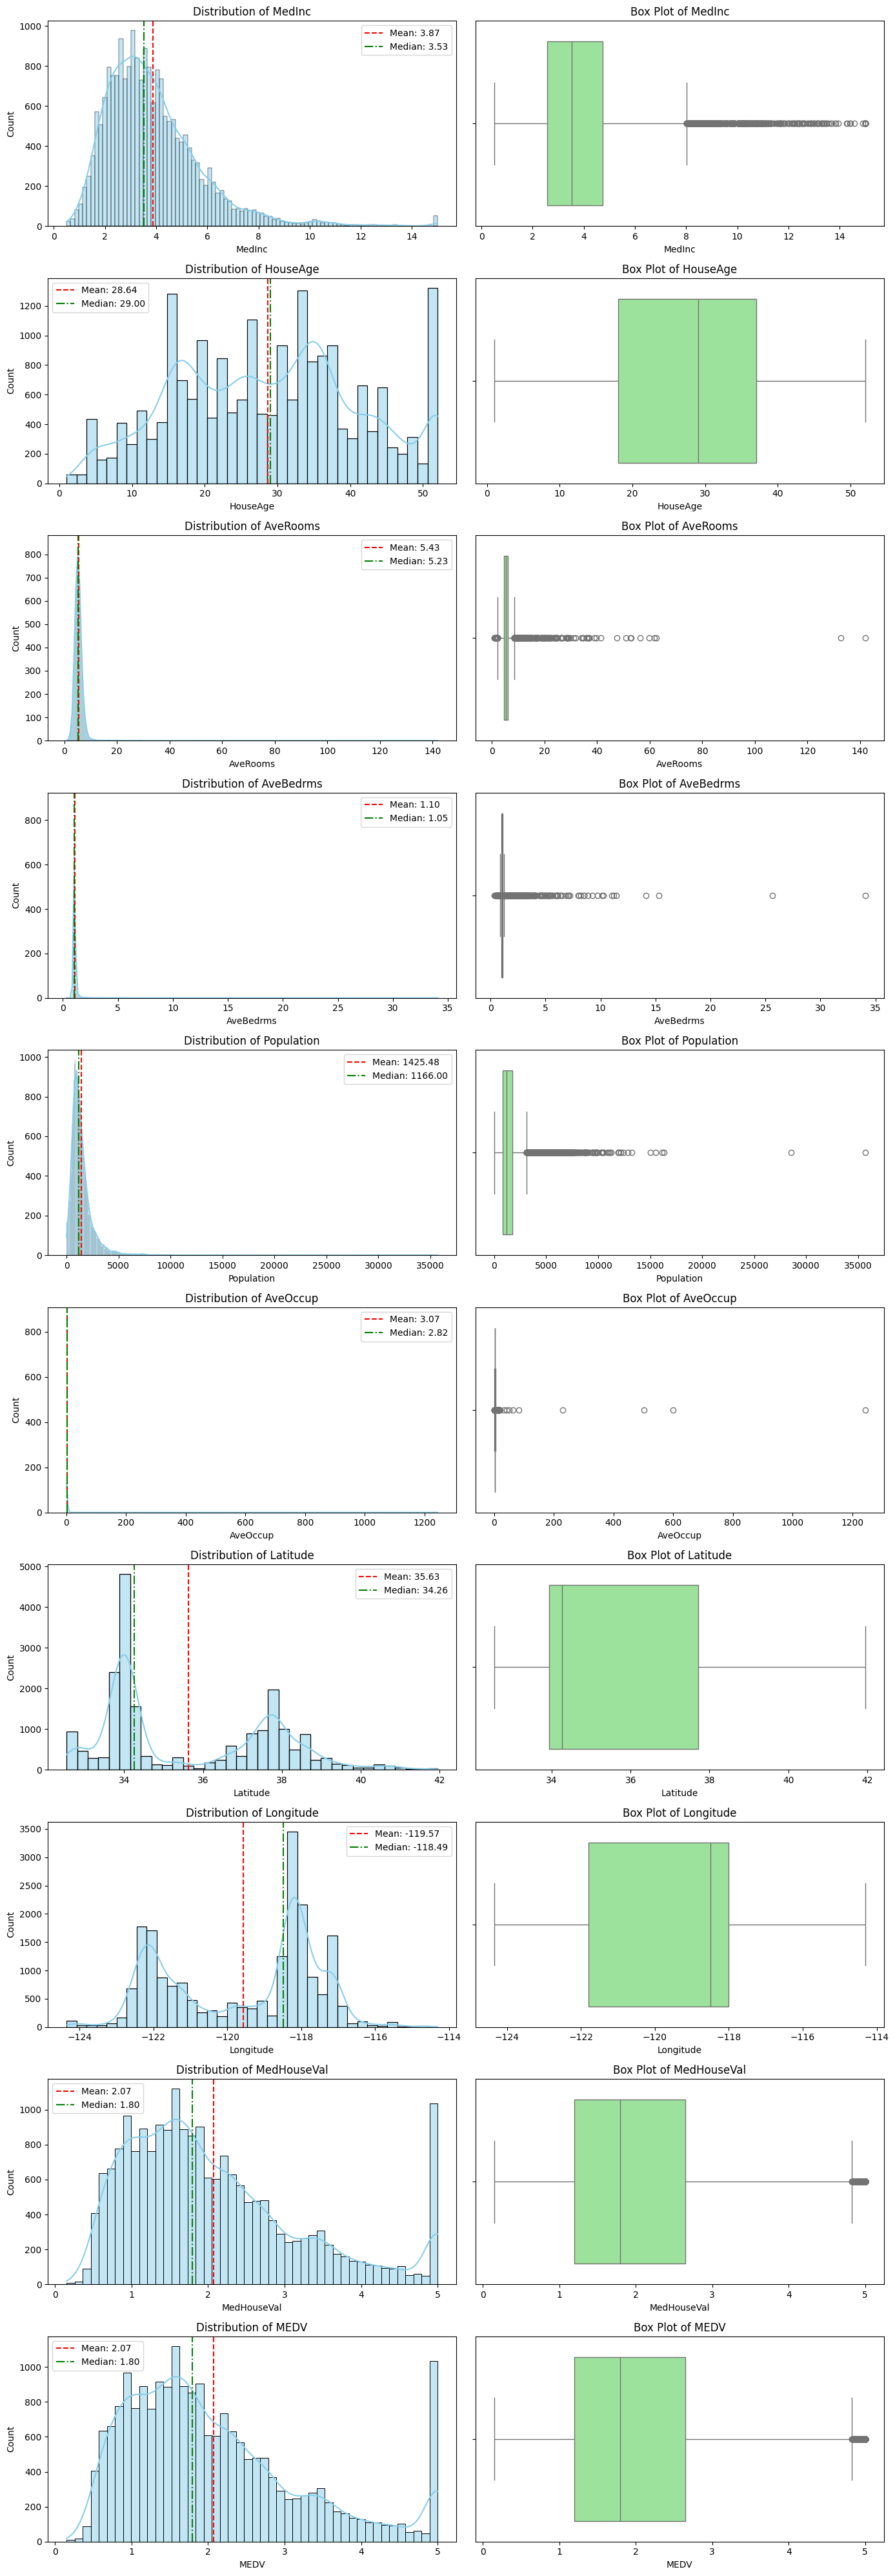

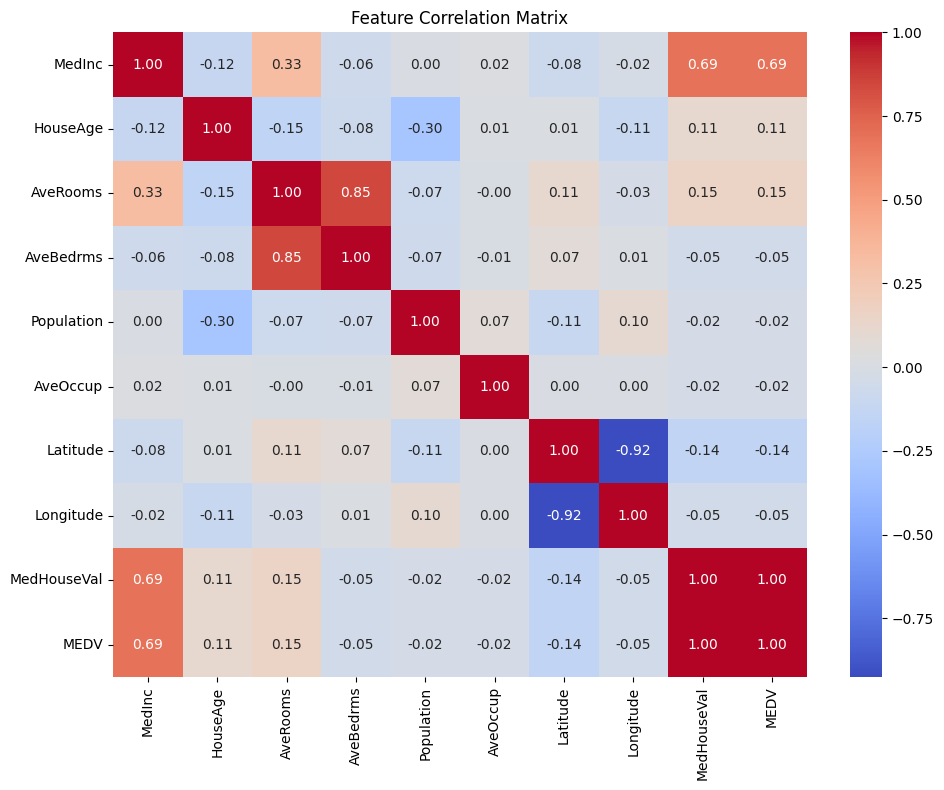

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing  

# Load the California Housing dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame
df['MEDV'] = housing.target  # Add target variable to the dataframe

# Print basic dataset information
print(f"Dataset shape: {df.shape}")
print("\nFeature information:")
for col in df.columns:
    print(f"{col}: {df[col].describe().loc[['min', 'mean', 'max']].to_dict()}")

# Set up the figure for visualizations
fig, axes = plt.subplots(len(df.columns), 2, figsize=(14, 4*len(df.columns)))
plt.subplots_adjust(hspace=0.5)

# Create histograms and box plots for each feature
for i, col in enumerate(df.columns):
    # Histogram with KDE
    sns.histplot(df[col], kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Distribution of {col}')
    axes[i, 0].axvline(df[col].mean(), color='red', linestyle='--', label=f'Mean: {df[col].mean():.2f}')
    axes[i, 0].axvline(df[col].median(), color='green', linestyle='-.', label=f'Median: {df[col].median():.2f}')
    axes[i, 0].legend()
    
    # Box plot
    sns.boxplot(x=df[col], ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'Box Plot of {col}')
    
    # Calculate outliers
    q1, q3 = df[col].quantile(0.25), df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound, upper_bound = q1 - 1.5*iqr, q3 + 1.5*iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    # Print outlier information
    print(f"\n{col} Analysis:")
    print(f"  Skewness: {df[col].skew():.2f}")
    print(f"  Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

# Save and show the plots
plt.tight_layout()
plt.savefig('california_housing_analysis.png')
plt.show()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

Dataset shape: (20640, 10)
MedInc → Min: 0.50, Mean: 3.87, Max: 15.00
HouseAge → Min: 1.00, Mean: 28.64, Max: 52.00
AveRooms → Min: 0.85, Mean: 5.43, Max: 141.91
AveBedrms → Min: 0.33, Mean: 1.10, Max: 34.07
Population → Min: 3.00, Mean: 1425.48, Max: 35682.00
AveOccup → Min: 0.69, Mean: 3.07, Max: 1243.33
Latitude → Min: 32.54, Mean: 35.63, Max: 41.95
Longitude → Min: -124.35, Mean: -119.57, Max: -114.31
MedHouseVal → Min: 0.15, Mean: 2.07, Max: 5.00
MEDV → Min: 0.15, Mean: 2.07, Max: 5.00


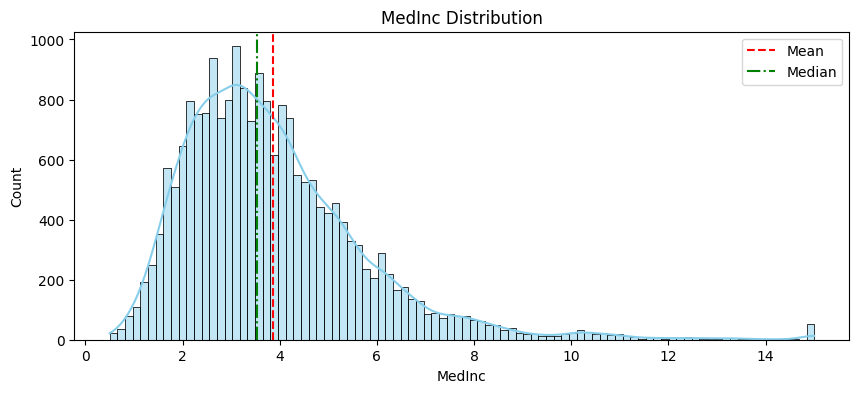

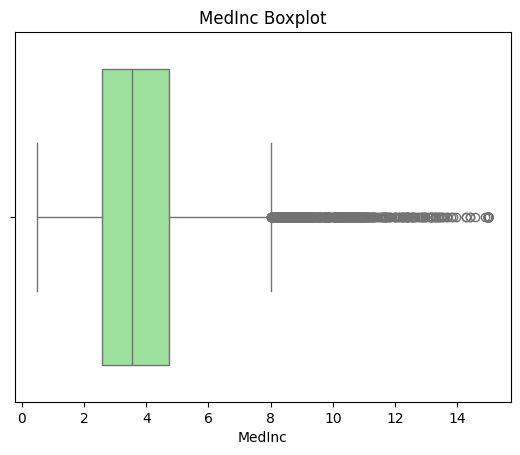

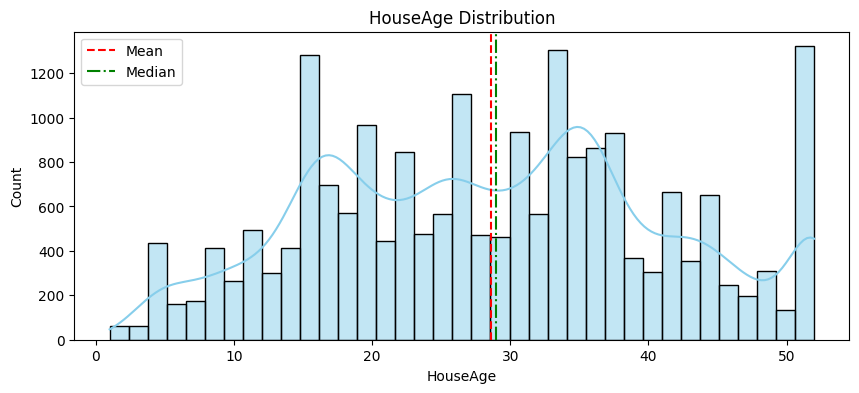

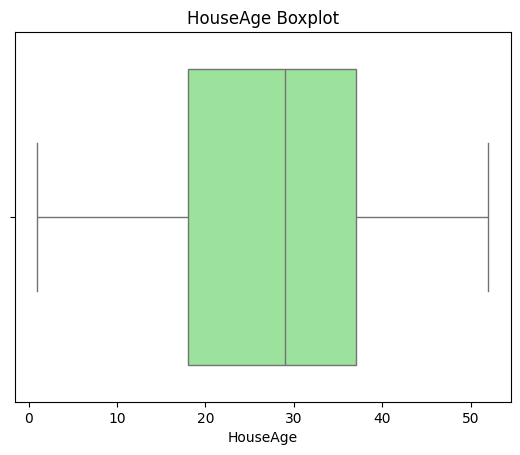

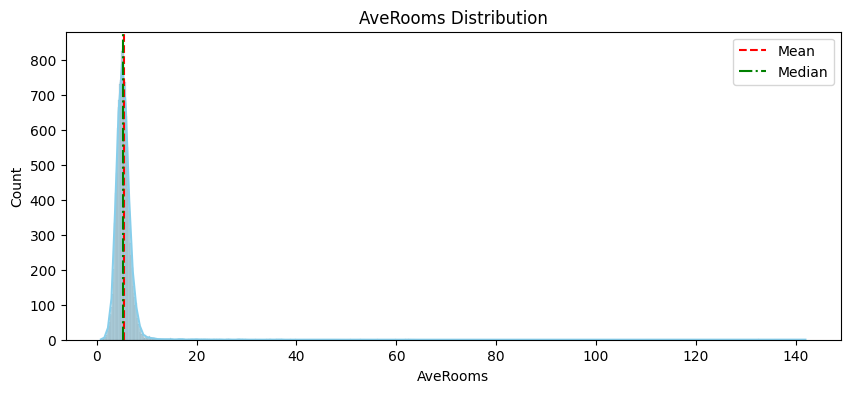

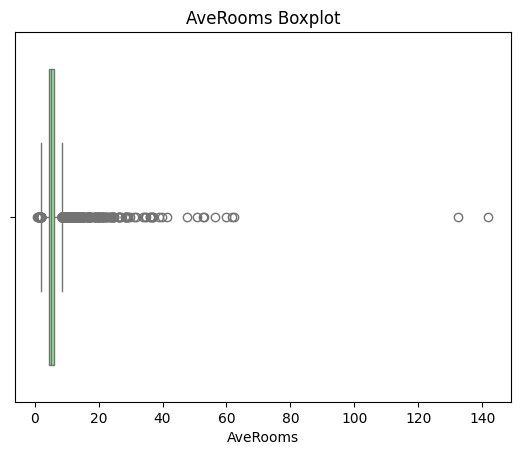

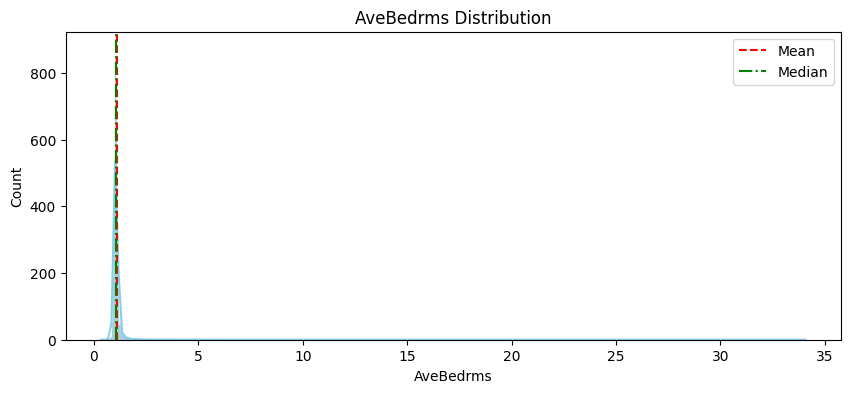

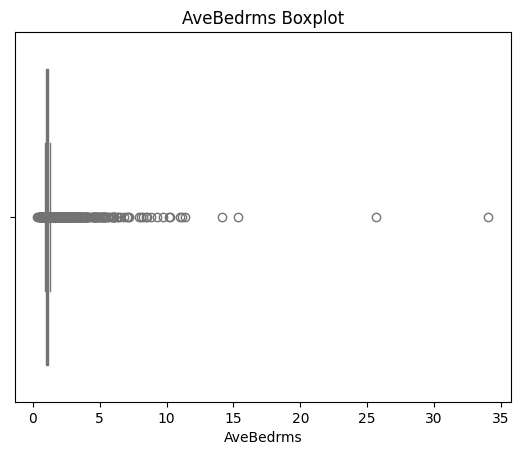

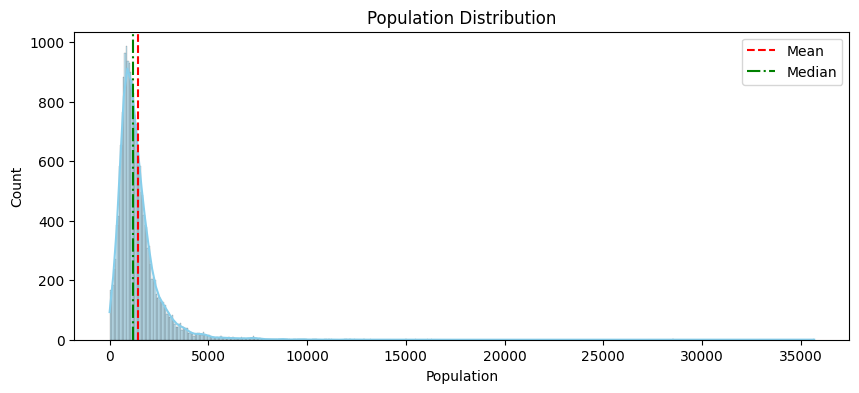

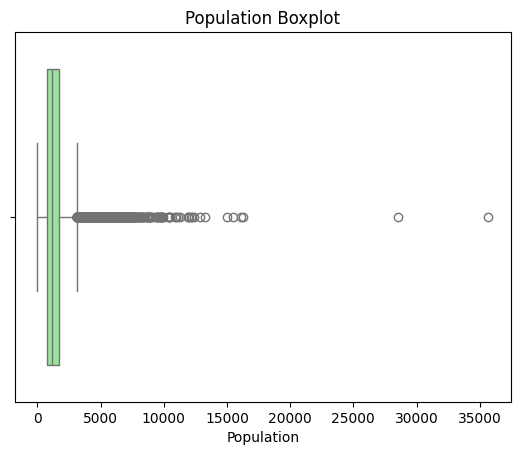

C:\Users\Dhana\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


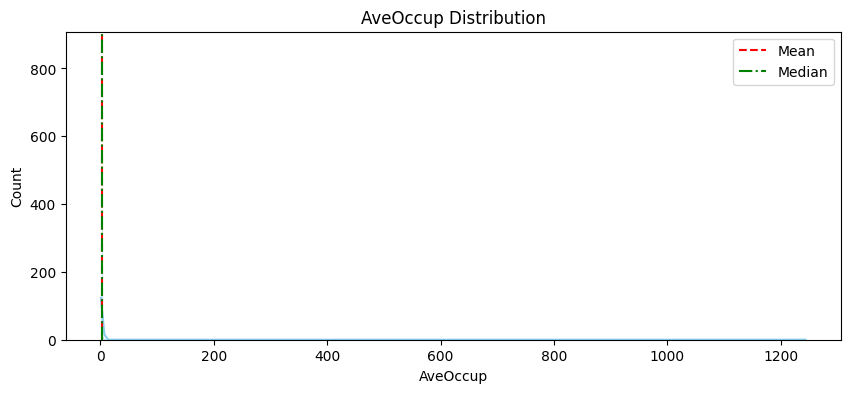

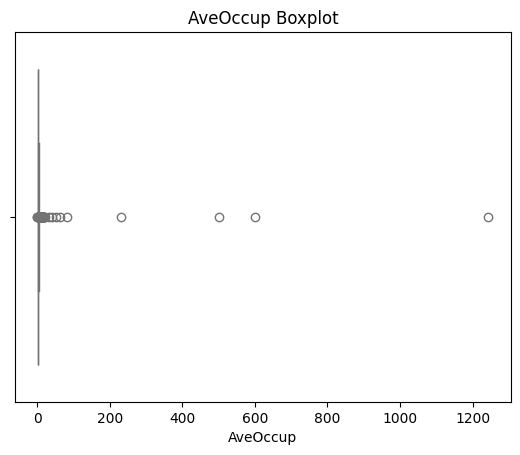

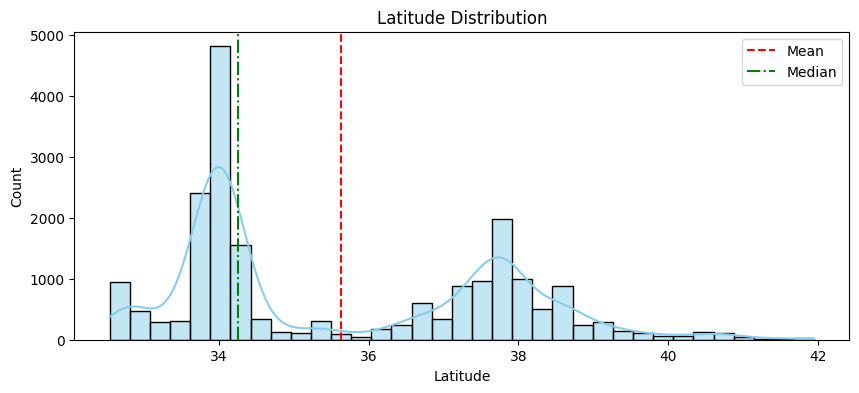

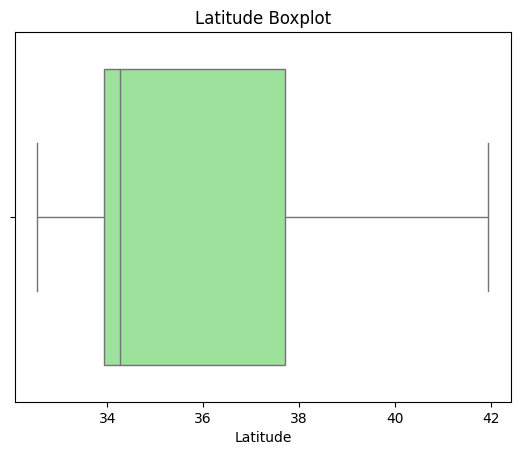

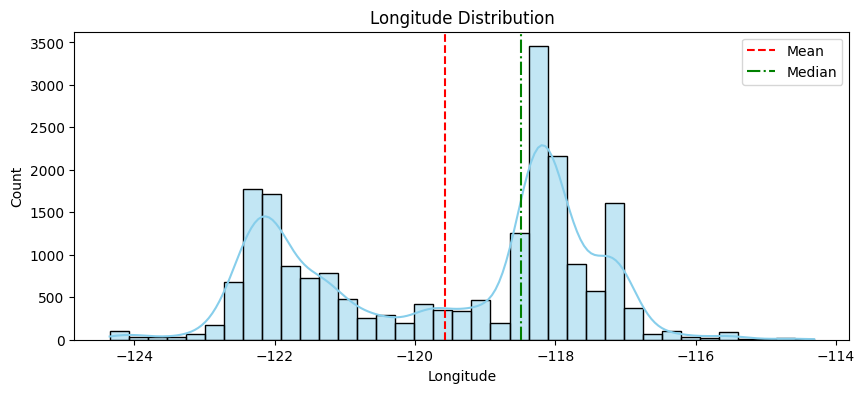

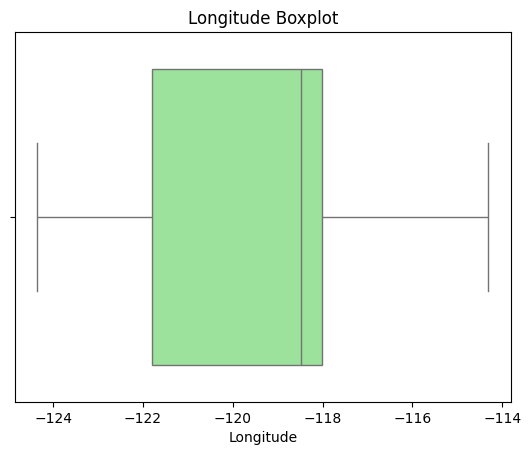

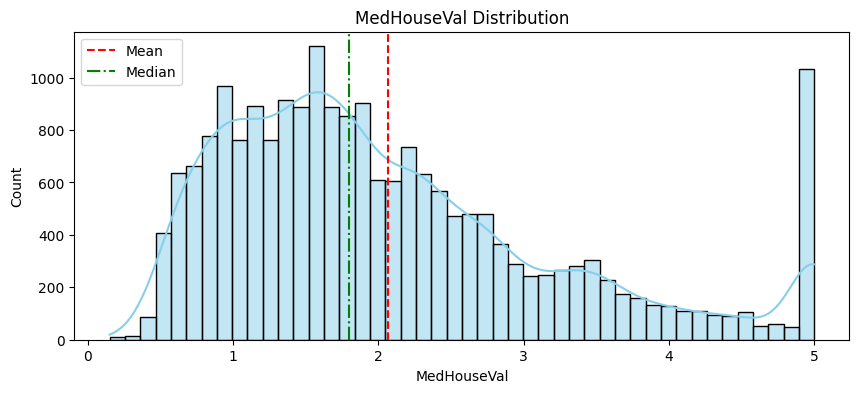

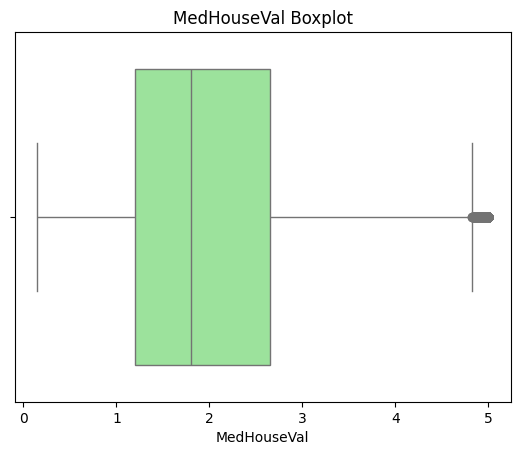

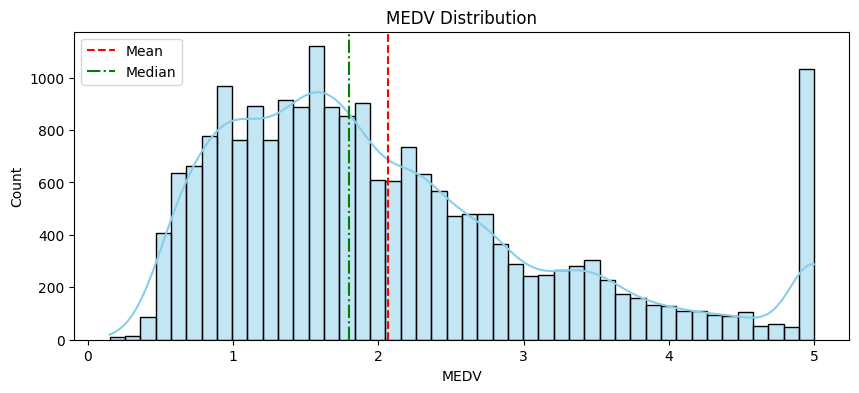

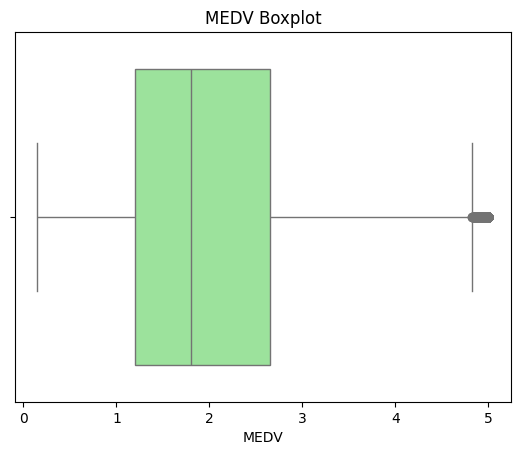

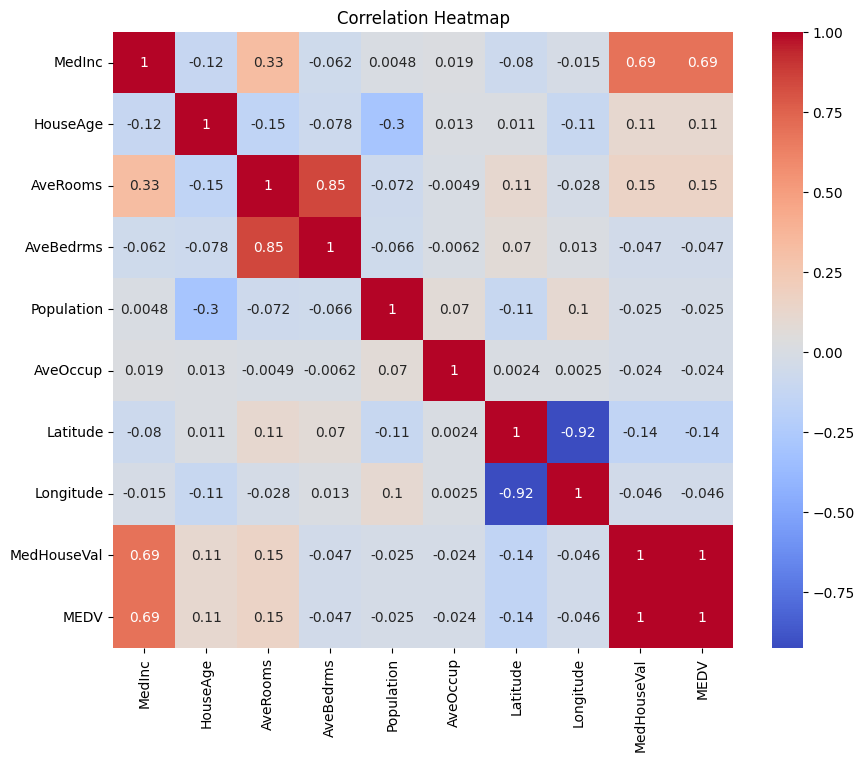

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Load data
data = fetch_california_housing(as_frame=True)
df = data.frame
df['MEDV'] = data.target

# Summary stats
print("Dataset shape:", df.shape)
for col in df.columns:
    print(f"{col} → Min: {df[col].min():.2f}, Mean: {df[col].mean():.2f}, Max: {df[col].max():.2f}")

# Plot histograms and boxplots
for col in df.columns:
    plt.figure(figsize=(10, 4))
    
    # Histogram
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.axvline(df[col].mean(), color='red', ls='--', label='Mean')
    plt.axvline(df[col].median(), color='green', ls='-.', label='Median')
    plt.title(f'{col} Distribution')
    plt.legend()
    plt.show()
    
    # Boxplot
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'{col} Boxplot')
    plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
